# あり・なしクイズをword2vecによって獲得したベクトルから求めてみた

#### 学習した単語ベクトルを使って2クラス分類

In [55]:
% pylab inline
from gensim.models import word2vec
import os,sys,glob
import numpy as np

import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Dropout,Activation

# 学習済みのモデルの読み込み
wv_model = word2vec.Word2Vec.load('data_spd_out.model')
keys = wv_model.wv.vocab.keys()

# あるなしクイズの問題と正解
wl=['猫','犬','町','村','音','臭い','坂','階段','一','二']
# ある-> 1,なし -> 0
train_y = keras.utils.to_categorical([1,0,1,0,1,0,1,0,1,0])

Populating the interactive namespace from numpy and matplotlib


In [56]:
# 学習データを作成
# model学習時に、単語-品詞として学習していたので、品詞を補っている

train = []

for w,l in zip(wl,train_y):
    try:
        vec = wv_model.wv[w+'-名詞']
        train.append((vec))
    except KeyError:
        vec = wv_model.wv[w+'-形容詞']
        train.append((vec))
    print(w,l,vec)
train_x = np.array(train)

猫 [0. 1.] [-8.71037170e-02  4.84089777e-02 -1.21691704e-01 -1.56820938e-02
  8.34430307e-02 -3.38677429e-02  8.67218897e-02 -9.61828008e-02
  1.46967888e-01  9.23410282e-02  4.01876196e-02 -2.59390334e-03
  2.13633224e-01  1.41475173e-02 -3.51268873e-02  5.18774763e-02
  1.34248704e-01 -1.16806827e-01  2.24577114e-01 -1.76376596e-01
 -4.66109179e-02 -2.14273930e-02 -3.68749276e-02 -4.87893708e-02
 -1.32327780e-01  2.20732465e-01 -3.51719409e-01  2.84637660e-01
  5.44378115e-03  1.99129149e-01 -2.09159479e-01 -1.27070054e-01
  6.91367164e-02  8.65624323e-02  1.23450883e-01  1.38002098e-01
 -7.42373541e-02  1.95960313e-01  8.18893593e-03  1.33944318e-01
 -1.13563210e-01 -5.29759750e-02 -4.38672423e-01  1.69639409e-01
 -2.29028448e-01  3.49942409e-02  3.11168760e-01  2.20863402e-01
 -7.68544376e-02  4.38808985e-02  3.27155381e-01  3.29593301e-01
  8.21715780e-03  3.43357563e-01  4.08534050e-01  2.84122109e-01
  2.01645672e-01  9.73021463e-02  1.81971908e-01 -6.38293894e-03
 -1.71921805e-0

In [57]:
# model構築と学習
model = Sequential()
model.add(Dense(100,input_dim = 200,activation='sigmoid'))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()
train_history=model.fit(train_x,train_y,epochs=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 202       
Total params: 30,402
Trainable params: 30,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 0s 39ms/step - loss: 0.7197 - acc: 0.5000
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 0.7019 - acc: 0.5000
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6829 - acc: 0.5000
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6749 - acc: 0.7000
Epoch 5/200
10/10 [======

10/10 [==============================] - 0s 3ms/step - loss: 0.2239 - acc: 1.0000
Epoch 80/200
10/10 [==============================] - 0s 514us/step - loss: 0.2183 - acc: 1.0000
Epoch 81/200
10/10 [==============================] - 0s 800us/step - loss: 0.2128 - acc: 1.0000
Epoch 82/200
10/10 [==============================] - 0s 259us/step - loss: 0.2073 - acc: 1.0000
Epoch 83/200
10/10 [==============================] - 0s 536us/step - loss: 0.2019 - acc: 1.0000
Epoch 84/200
10/10 [==============================] - 0s 276us/step - loss: 0.1967 - acc: 1.0000
Epoch 85/200
10/10 [==============================] - 0s 603us/step - loss: 0.1914 - acc: 1.0000
Epoch 86/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1863 - acc: 1.0000
Epoch 87/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1812 - acc: 1.0000
Epoch 88/200
10/10 [==============================] - 0s 294us/step - loss: 0.1762 - acc: 1.0000
Epoch 89/200
10/10 [=============================

Epoch 164/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0089 - acc: 1.0000
Epoch 165/200
10/10 [==============================] - 0s 388us/step - loss: 0.0085 - acc: 1.0000
Epoch 166/200
10/10 [==============================] - 0s 360us/step - loss: 0.0081 - acc: 1.0000
Epoch 167/200
10/10 [==============================] - 0s 391us/step - loss: 0.0077 - acc: 1.0000
Epoch 168/200
10/10 [==============================] - 0s 819us/step - loss: 0.0073 - acc: 1.0000
Epoch 169/200
10/10 [==============================] - 0s 367us/step - loss: 0.0070 - acc: 1.0000
Epoch 170/200
10/10 [==============================] - 0s 974us/step - loss: 0.0067 - acc: 1.0000
Epoch 171/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0063 - acc: 1.0000
Epoch 172/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0060 - acc: 1.0000
Epoch 173/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0057 - acc: 1.0000
Epoch 174/200
10/10 [=======

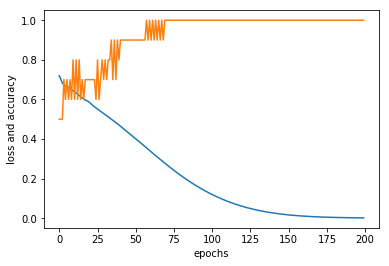

In [58]:
# 学習曲線
xlabel('epochs')
ylabel('loss and accuracy')
plot(train_history.history['loss'],label='train loss') 
plot(train_history.history['acc'],label='train accuracy')

In [59]:
# では本題、過去は、どちらに分類されるか

test_x = wv_model.wv['過去-名詞']
#print(test_x)

result=model.predict(np.array([test_x]))
print(result)

[[0.9584132  0.04158685]]


結果 なし:約96%, あり:約4% 

結論:「過去」は「なし」に分類されるらしい